In [1]:
import numpy as np
import matplotlib.pyplot as plt



---

# 기초


## 미분
어떤 곡선의 서로 다른 두 점의 연결선(할선)의 기울기는 다음과 같다:

$$\frac{Δy}{Δx}=\frac{f(x)-f(a)}{x-a}.$$

점 $(x,f(x))$가 점 $(a,f(a))$에 매우 가까워지면(즉, $\Delta x → 0$일 때) 연결선은 접선이 된다. 이 때 점 $(a, f(a))$에서의 기울기 $k$는 다음과 같이 표현할 수 있다:

$$k = \lim_{\Delta x \to 0} \frac{Δy}{Δx}= \lim_{x \to a} \frac{f(x)-f(a)}{x-a}.$$

이는 어떤 함수의 순간 변화율과 같은데, 이를 미분계수라고 말할 수 있다. 접선의 기울기(순간 변화율, 미분계수)를 **함수의 미분**이라고 말할 수 있으며 표기법은 다음과 같다:

$$k = f'(a)=\frac{dy}{dx}|_{x=a}.$$

일반화하자면 미분 또는 미분 계수 또는 순간 변화율은 평균 변화율의 극한을 의미하는 용어로 다음과 같이 표기할 수 있다:

$$ f'(x) = \frac{dy}{dx}=\lim_{\Delta x \to 0} \frac{Δy}{Δx}= \lim_{x \to 0} \frac{f(x+Δx)-f(x)}{\Delta x}.$$


### **실습 1**
1) $f(x)=-x$일 때, $f(1)$?

2) $g(x)=3x^4$일 때, $g(1)$?

3) $h(x)=\text{sin}x$일 때, $h(0)$?

In [2]:
def diff(f, x, h):
  '''
  미분하는 파이썬 함수를 만듦
  f: 미분하려는 함수
  x: point
  h: step size
  '''
  return (f(x+h)-f(x))/h

In [3]:
# 1
def f(x):
  return -x

diff(f, x=1, h=0.001)

-0.9999999999998899

In [4]:
# 2
def g(x):
  return 3*x**4

diff(g, x=1, h=0.001)

12.018012002998457

In [6]:
# 1
def h(x):
  return np.sin(x)

diff(h, x=0, h=0.001)

np.float64(0.9999998333333416)

### **실습 2**
$f(x)=x\text{sin}(x^2)+1$를 그리고, 마찬가지로 $x = -1, 0, 2$에서의 접선을 그리자.

In [9]:
def f(x):
  return x*np.sin(x**2)+1

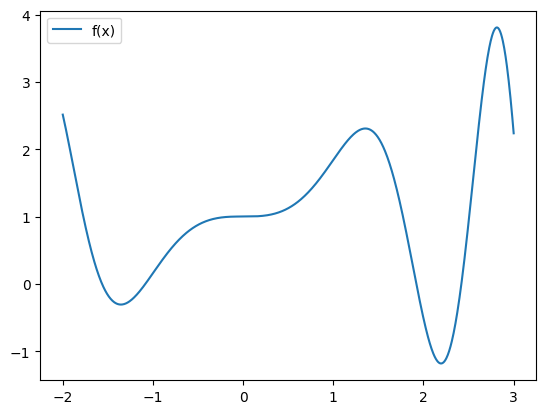

In [16]:
xarr = np.linspace(-2,3,1000)
yarr = f(xarr)

plt.plot(xarr, yarr, label='f(x)')
plt.legend()
plt.show()

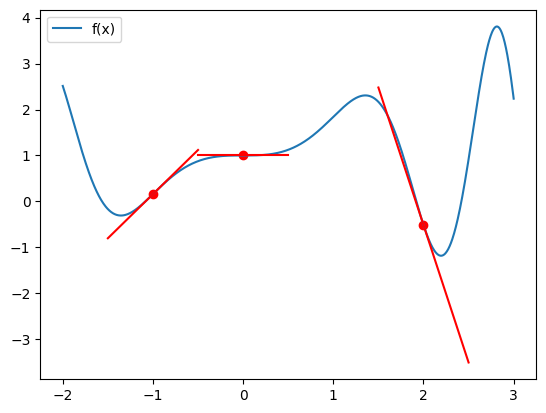

In [15]:
xarr = np.linspace(-2,3,1000)
yarr = f(xarr)

plt.plot(xarr, yarr, label='f(x)')
for i in [-1,0,2]:
  xarr = np.linspace(i-0.5,i+0.5,100)
  plt.plot(xarr, diff(f, x=i, h=0.000001)*(xarr-(i))+f(i), color='red')
  plt.scatter(i, f(i), color='red')
plt.legend()
plt.show()

### **더 나아가기**
`sympy` 라이브러리를 활용하여 더욱 쉽게 미분이 가능하다!

※ 참고:
- https://bio-info.tistory.com/150
- https://dibrary.tistory.com/122

In [23]:
import sympy as sym

In [24]:
x = sym.Symbol('x')
a = sym.diff((x**3+x**2+x+1),x)

print(a)

3*x**2 + 2*x + 1


In [27]:
# 이계도함수(미분 두 번)
x = sym.Symbol('x')
a = sym.diff((x**3+x**2+x+1),x,2)

print(a)

2*(3*x + 1)


In [28]:
# 삼계도함수(미분 세 번)
x = sym.Symbol('x')
a = sym.diff((x**3+x**2+x+1),x,3)

print(a)

6


In [26]:
# 미분계수
x = sym.Symbol('x')
a = sym.diff((x**3+x**2+x+1),x).subs(x, 3)

print(a)

34




---


## 테일러 급수

테일러 급수는 어떤 함수를 다항식으로 나타낼 때 사용하는 표현 방법이다. $a$에서 함수 $f$를 다음과 같이 표현할 수 있다:

$$f(x) = \sum^∞_{n=0} \frac{f^{(n)}(a)}{n!}(x-a)^n\\
f(x)=f(a)+(x-a)f'(a)+\frac{(x-a)^2}{2!}f''(a)+\cdots.$$

※ 증명은 생략한다! 더 알고 싶은 학생은 https://angeloyeo.github.io/2019/09/02/Taylor_Series.html#fn:1 참고!

언제 쓰이냐? 수치적인 계산을 할 때 사용된다! 쉽게 설명하자면 엄밀한 수학적인 계산을 하는 것이 어려울 수 있는데, 그때 사용한다.
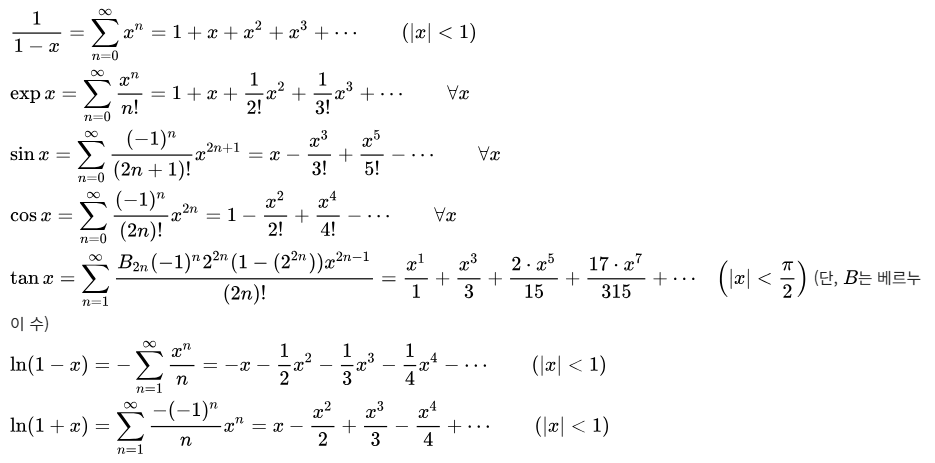

위의 예시들은 특히 $a=0$일 때의 테일러 급수이며, 이 경우 특별히 매클로린 급수라고 한다.

### **실습 3**

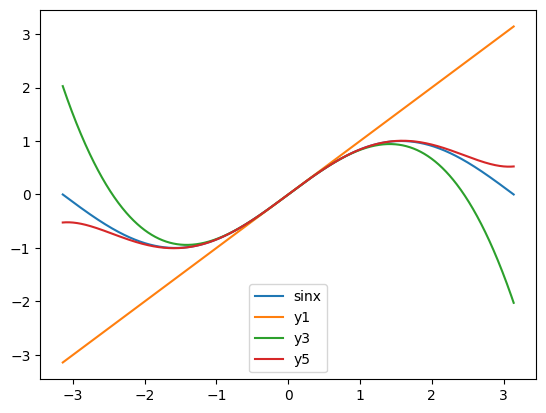

In [37]:
xarr = np.linspace(-np.pi, np.pi, 1000)
y0 = np.sin(xarr)
y1 = xarr
y3 = xarr - xarr**3/6
y5 = xarr - xarr**3/6 + xarr**5/120

plt.plot(xarr, y0, label='sinx')
plt.plot(xarr, y1, label='y1')
plt.plot(xarr, y3, label='y3')
plt.plot(xarr, y5, label='y5')
plt.legend()
plt.show()

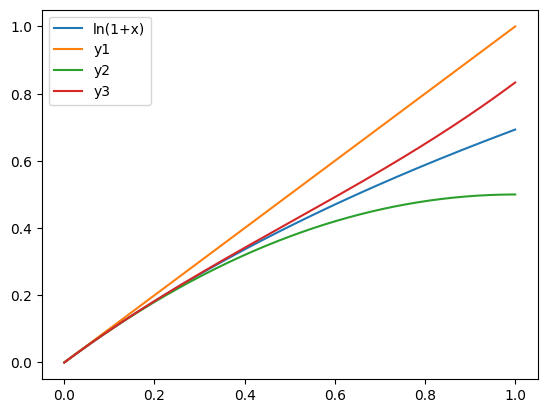

In [41]:
xarr = np.linspace(0, 1, 1000)
y0 = np.log(1+xarr)
y1 = xarr
y2 = xarr - xarr**2/2
y3 = xarr - xarr**2/2 + xarr**3/3

plt.plot(xarr, y0, label='ln(1+x)')
plt.plot(xarr, y1, label='y1')
plt.plot(xarr, y2, label='y2')
plt.plot(xarr, y3, label='y3')
plt.legend()
plt.show()


---

---
# 심화


- Euler's method
- Improved Euler method
- Fourth-order Runge-Kutta method

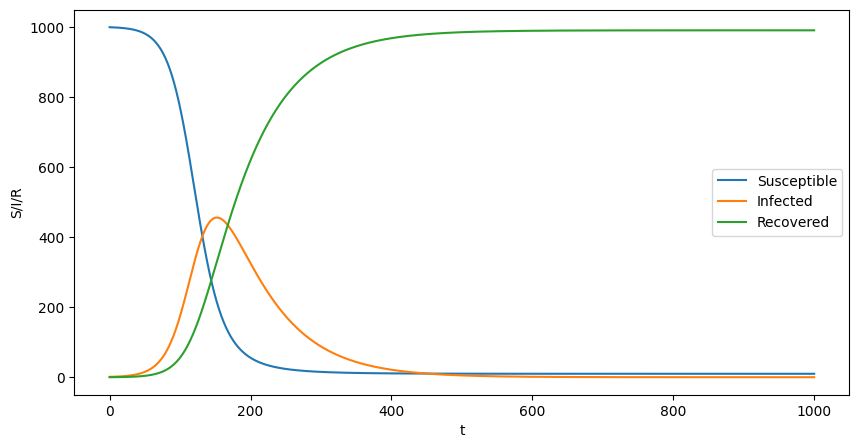

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000  # 전체 사람 수
I0 = 1    # 초기 감염자
S, I, R = N - I0, I0, 0.0
beta = 0.07       # 감염률
gamma = 0.015     # 회복률

T = 1000
dt = 0.01

def deriv(S, I, R, beta, gamma, N):
  return -beta*S*I/N, beta*S*I/N - gamma*I, gamma*I

tarr = []
Sarr = []
Iarr = []
Rarr = []
for t in np.arange(0.0, T, dt):
  tarr.append(t)
  Sarr.append(S)
  Iarr.append(I)
  Rarr.append(R)
  dSdt1, dIdt1, dRdt1 = deriv(S, I, R, beta, gamma, N)
  Stem = S + dt*dSdt1
  Iem = I + dt*dIdt1
  Rem = R + dt*dRdt1
  dSdt2, dIdt2, dRdt2 = deriv(Stem, Iem, Rem, beta, gamma, N)
  S += 0.5*dt*(dSdt1 + dSdt2)
  I += 0.5*dt*(dIdt1 + dIdt2)
  R += 0.5*dt*(dRdt1 + dRdt2)

plt.figure(figsize=(10, 5))
plt.plot(tarr, Sarr, label='Susceptible')
plt.plot(tarr, Iarr, label='Infected')
plt.plot(tarr, Rarr, label='Recovered')
plt.legend()
plt.xlabel('t')
plt.ylabel('S/I/R')
plt.show()

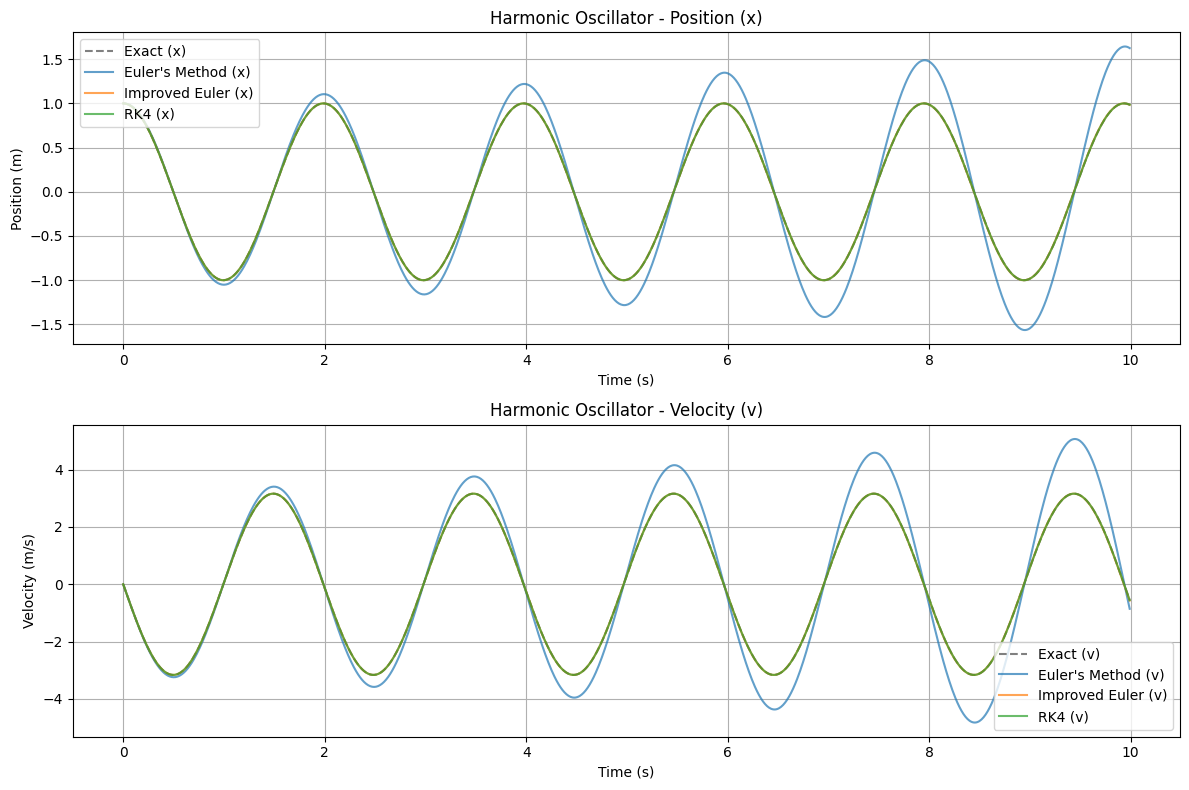

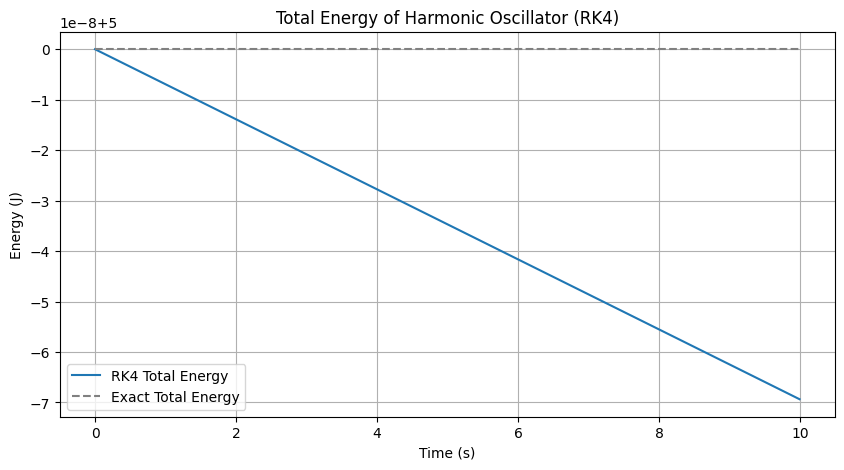

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 조화 진동자 파라미터
m = 1.0  # 질량 (kg)
k = 10.0 # 용수철 상수 (N/m)
omega = np.sqrt(k / m) # 각진동수

# 초기 조건
x0 = 1.0 # 초기 변위 (m)
v0 = 0.0 # 초기 속도 (m/s)

# 시뮬레이션 시간 설정
t_start = 0.0
t_end = 10.0
dt = 0.01 # 시간 간격
num_steps = int((t_end - t_start) / dt)

# 미분 방정식 정의 (dx/dt = v, dv/dt = -omega^2 * x)
def harmonic_oscillator_system(state, t):
    x, v = state
    dxdt = v
    dvdt = -omega**2 * x
    return np.array([dxdt, dvdt])

# --------------------------------------------------
# 1. Euler's Method (오일러 방법)
# --------------------------------------------------
def euler_method(initial_state, t_span, dt, func):
    t = np.arange(t_span[0], t_span[1], dt)
    num_steps = len(t)
    states = np.zeros((num_steps, len(initial_state)))
    states[0] = initial_state

    for i in range(num_steps - 1):
        current_state = states[i]
        dstate_dt = func(current_state, t[i])
        states[i+1] = current_state + dt * dstate_dt
    return t, states

# --------------------------------------------------
# 2. Improved Euler Method (개선된 오일러 방법)
#    - Heun's method (흔의 방법) 이라고도 함
# --------------------------------------------------
def improved_euler_method(initial_state, t_span, dt, func):
    t = np.arange(t_span[0], t_span[1], dt)
    num_steps = len(t)
    states = np.zeros((num_steps, len(initial_state)))
    states[0] = initial_state

    for i in range(num_steps - 1):
        current_state = states[i]
        dstate_dt_predictor = func(current_state, t[i]) # 예측자 (Euler 예측)
        predicted_state = current_state + dt * dstate_dt_predictor

        dstate_dt_corrector = func(predicted_state, t[i] + dt) # 교정자 (예측된 상태에서 다시 계산)
        states[i+1] = current_state + 0.5 * dt * (dstate_dt_predictor + dstate_dt_corrector)
    return t, states

# --------------------------------------------------
# 3. Runge-Kutta 4th Order (RK4, 룽게-쿠타 4차 방법)
# --------------------------------------------------
def rk4_method(initial_state, t_span, dt, func):
    t = np.arange(t_span[0], t_span[1], dt)
    num_steps = len(t)
    states = np.zeros((num_steps, len(initial_state)))
    states[0] = initial_state

    for i in range(num_steps - 1):
        current_state = states[i]

        k1 = func(current_state, t[i])
        k2 = func(current_state + 0.5 * dt * k1, t[i] + 0.5 * dt)
        k3 = func(current_state + 0.5 * dt * k2, t[i] + 0.5 * dt)
        k4 = func(current_state + dt * k3, t[i] + dt)

        states[i+1] = current_state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return t, states

# --------------------------------------------------
# 시뮬레이션 실행 및 결과 플로팅
# --------------------------------------------------

initial_state = np.array([x0, v0])
t_span = [t_start, t_end]

# 각 방법으로 시뮬레이션
t_euler, states_euler = euler_method(initial_state, t_span, dt, harmonic_oscillator_system)
t_improved_euler, states_improved_euler = improved_euler_method(initial_state, t_span, dt, harmonic_oscillator_system)
t_rk4, states_rk4 = rk4_method(initial_state, t_span, dt, harmonic_oscillator_system)

# 정확한 해 (비교용)
t_exact = np.arange(t_span[0], t_span[1], dt)
x_exact = x0 * np.cos(omega * t_exact)
v_exact = -x0 * omega * np.sin(omega * t_exact)

# 결과 플로팅
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_exact, x_exact, label='Exact (x)', linestyle='--', color='gray')
plt.plot(t_euler, states_euler[:, 0], label="Euler's Method (x)", alpha=0.7)
plt.plot(t_improved_euler, states_improved_euler[:, 0], label="Improved Euler (x)", alpha=0.7)
plt.plot(t_rk4, states_rk4[:, 0], label="RK4 (x)", alpha=0.7)
plt.title('Harmonic Oscillator - Position (x)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_exact, v_exact, label='Exact (v)', linestyle='--', color='gray')
plt.plot(t_euler, states_euler[:, 1], label="Euler's Method (v)", alpha=0.7)
plt.plot(t_improved_euler, states_improved_euler[:, 1], label="Improved Euler (v)", alpha=0.7)
plt.plot(t_rk4, states_rk4[:, 1], label="RK4 (v)", alpha=0.7)
plt.title('Harmonic Oscillator - Velocity (v)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 에너지 보존 확인 (RK4의 경우)
# 총 에너지 E = 0.5 * m * v^2 + 0.5 * k * x^2
energy_rk4 = 0.5 * m * states_rk4[:, 1]**2 + 0.5 * k * states_rk4[:, 0]**2
energy_exact = 0.5 * m * v_exact**2 + 0.5 * k * x_exact**2

plt.figure(figsize=(10, 5))
plt.plot(t_rk4, energy_rk4, label='RK4 Total Energy')
plt.plot(t_exact, energy_exact, label='Exact Total Energy', linestyle='--', color='gray')
plt.title('Total Energy of Harmonic Oscillator (RK4)')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.grid(True)
plt.show()